In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt

In [2]:
train_dir = "../content/drive/MyDrive/train/" #passing the path with training images
test_dir = "../content/drive/MyDrive/test/"   #passing the path with testing images

In [3]:
classes=os.listdir("../content/drive/MyDrive/train/")
classes

['surprise', 'sad', 'neutral', 'happy', 'angry', 'disgust', 'fear']

In [4]:
train_count = []
train_dict={}
test_count = []
test_dict ={}
# avg_of_train_data=0
# avg_of_test_data=0

def test_train_distribution():
  print("Train Set :")

  

  for folder in os.listdir(train_dir) :
      # print(folder, "folder contains:", len(os.listdir(train_dir+folder)), "image")
      train_count.append(len(os.listdir(train_dir+folder)))
      train_dict[folder]=len(os.listdir(train_dir+folder))
  avg_of_train_data=sum(train_count)/len(train_count)
  print(train_dict)
  print("Avgerage dataset len should be ~",round(avg_of_train_data))    
  print()

  #####################test##################

 #####################test##################

  
  print("Test Set :")
  


  for folder in os.listdir(test_dir) :
      # print(folder, "folder contains:", len(os.listdir(test_dir+folder)), "images")
      test_count.append(len(os.listdir(test_dir+folder)))
      test_dict[folder]=len(os.listdir(test_dir+folder))
  avg_of_test_data=sum(test_count)/len(test_count)
  print("Avgerage dataset len should be ~",round(avg_of_test_data)) 

  print(test_dict)
  


test_train_distribution()

Train Set :
{'surprise': 3171, 'sad': 4830, 'neutral': 4965, 'happy': 7220, 'angry': 3995, 'disgust': 436, 'fear': 4097}
Avgerage dataset len should be ~ 4102

Test Set :
Avgerage dataset len should be ~ 1027
{'surprise': 831, 'neutral': 1243, 'angry': 958, 'fear': 1024, 'disgust': 111, 'sad': 1247, 'happy': 1774}


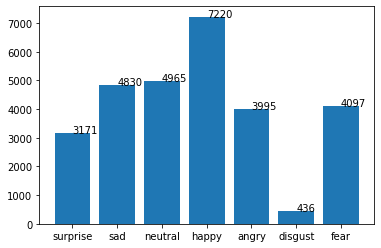

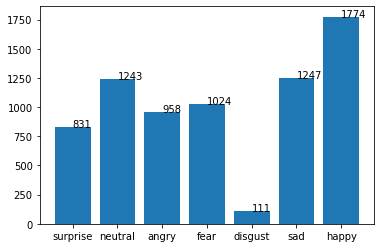

In [5]:
def plot_data_dist(dictn):
  def addlabels(x,y):
      for i in range(len(x)):
          plt.text(i,y[i],y[i])


  names = list(dictn.keys())
  values = list(dictn.values())
  addlabels(names,values)

  plt.bar(range(len(dictn)), values, tick_label=names)
  plt.show()

plot_data_dist(train_dict)
plot_data_dist(test_dict)


In [6]:
#averages of train test sets
avg_of_train_data=round(sum(train_count)/len(train_count))
avg_of_test_data=round(sum(test_count)/len(test_count))
avg_of_train_data,avg_of_test_data
#average of test train

(4102, 1027)

In [7]:
#Definnig a function to do so 
def grayscale_RGB_and_upsizing(image,size=[224,224]):
    
    image = tf.image.resize(tf.convert_to_tensor(image), size)

    return image

In [8]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout,MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
# train_datagen=ImageDataGenerator(rescale=1/255)
# test_datagen=ImageDataGenerator(rescale=1/255)

train_datagen=ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 preprocessing_function=grayscale_RGB_and_upsizing)
test_datagen=ImageDataGenerator(rescale=1/255,
                                preprocessing_function=grayscale_RGB_and_upsizing)
train_set=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                    
                                             class_mode='categorical')
test_set=test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             
                                             class_mode='categorical')

Found 28714 images belonging to 7 classes.
Found 7188 images belonging to 7 classes.


In [9]:
# See the shape of any data
train_sample=next(train_set)
print(train_sample[0].shape)

(32, 224, 224, 3)


In [10]:
train_set.class_indices
#Optional list of class subdirectories (e.g. ['dogs','cats']).
# Default: None. If not provided, the list of classes will be automatically 
#inferred from the subdirectory names/structure under directory

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [11]:
model=tf.keras.applications.MobileNetV2()

14548992/14536120 [==============================] - 0s 0us/step


In [12]:
# model.summary()
#Removing last layer 
ip=model.layers[0].input
op=model.layers[-2].output
op

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [13]:
#adding last layers 
final_output=keras.layers.Dense(128)(op)
final_output=keras.layers.Activation('relu')(final_output)
final_output=keras.layers.Dense(64)(final_output)
final_output=keras.layers.Activation('relu')(final_output)
final_output=keras.layers.Dense(7,activation='softmax')(final_output)

final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [14]:
new_model=keras.Model(inputs =ip,outputs=final_output)
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [15]:
new_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#'categorical_crossentropy': to find loss in multiclass classification with OHE output
#optimizer ! 
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early=EarlyStopping(monitor='val_accuracy',patience=3,restore_best_weights=True,verbose=1,min_delta=0.001)
history=new_model.fit(train_set,epochs=2,validation_data=test_set,batch_size=32)

Epoch 1/2
898/898 [==============================] - 6983s 8s/step - loss: 1.2513 - accuracy: 0.5317 - val_loss: 3.3003 - val_accuracy: 0.3954
Epoch 2/2
898/898 [==============================] - 5832s 6s/step - loss: 1.1095 - accuracy: 0.5857 - val_loss: 4.8667 - val_accuracy: 0.1913


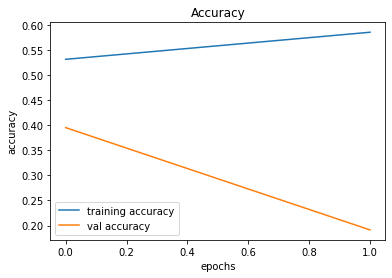

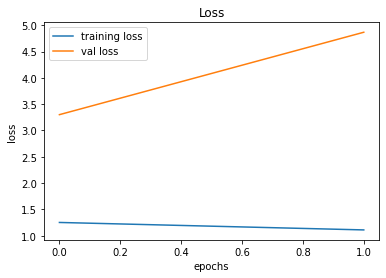

In [18]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [28]:
y_pred = model.predict(test_set, batch_size=32)

NameError: ignored

In [26]:
new_model.save_weights('/content/drive/MyDrive/model_weights.h5')